# Event Hot Zone tracker
I love baseball so I wanted to create a program that could take a StatsCast file and output the zones the batter has these events occur. Obviously, this doesn't work for players whose stats exist before the advent of StatsCast.

In [83]:
#Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Creation of the function
Rather than having to go through the steps over and over again to view zones home runs are hit from, I am creating a function to do the work for me and it outputs the proportional frequency of events for each portion of the strike zone

In [84]:
# You'll need to create a dataframe to use this function
def visualize_event(dataframe, event='home_run'):
    """
    Takes in a dataframe, event in the form of a string from StatsCast data, and the player's name in the form
    of a string and outputs a 2D histogram of pitch locations for the event. 
    This only works on pitches that in the strike zone.
    """
    # Extracts a dataframe of only the called events
    player_event = dataframe[dataframe['events'] == event]
    
    # Pulls player name from dataframe, splits at comma and reverses name order
    player = dataframe['player_name'][0]
    player_split = player.split(',')
    first_name = player_split[1]
    first_name = first_name.strip()
    last_name = player_split[0]
    player = first_name + " " + last_name
    
    # Functions used later to convert individual zones into (x, y)-coordinate forms
    def assign_x_coord(row):
        """
        Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13, 
        and 14 are ignored for plotting simplicity.
        """
        # Left third of strike zone
        if row.zone in [1, 4, 7]:
            return 1
        # Middle third of strike zone
        if row.zone in [2, 5, 8]:
            return 2
        # Right third of strike zone
        if row.zone in [3, 6, 9]:
            return 3
    
    def assign_y_coord(row):
        """
        Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
        and 14 are ignored for plotting simplicity.
        """
        # Upper third of strike zone
        if row.zone in [1, 2, 3]:
            return 3
        # Middle third of strike zone
        if row.zone in [4, 5, 6]:
            return 2
        # Lower third of strike zone
        if row.zone in [7, 8, 9]:
            return 1
    
    # Convert the dataframe's event string to a more usable form for the title of the plot
    event_string = ''
    
    if event == 'home_run':
        event_string = "Home Runs"
    elif event == 'strikeout':
        event_string = 'Strikeouts'
    elif event == 'field_out':
        event_string = 'Field Outs'
    elif event == 'walk':
        event_string = 'Walks'
    elif event == 'single':
        event_string = 'Singles'
    elif event == 'double':
        event_string = 'Doubles'
    elif event == 'grounded_into_double_play':
        event_string = 'Double Plays'
    elif event == 'force_out':
        event_string = 'Force Outs'
    elif event == 'intent_walk':
        event_string = 'Intentional Walks'  # Chances are there are none of these in the strike zone
    elif event == 'hit_by_pitch':
        event_string = 'Hits by Pitch'  # I doubt there will be any of these in the strike zone either
    elif event == 'fielders_choice_out':
        event_string = "Fielders Choice Outs"
    elif event == 'sac_fly':
        event_string = "Sacrifice Flies"
    elif event == 'field_error':
        event_string = 'On Base by Field Errors'
    elif event == 'triple':
        event_string = 'Triples'
    elif event == 'strikeout_double_play':
        event_string = 'Strikeout Double Plays'
    else:
        event_string = event
    
    # Making the dataframe ignore events outside the strike zone
    player_strike_event = player_event.copy().loc[player_event.zone <= 9]
    
    # Assign (x, y) values to pitches in strike zones for event
    player_strike_event['zone_x'] = player_strike_event.apply(assign_x_coord, axis=1)
    player_strike_event['zone_y'] = player_strike_event.apply(assign_y_coord, axis=1)
    
    # Plotting Player's event strike zone as a 2D histogram with a colorbar
    plt.hist2d(player_strike_event.zone_x, player_strike_event.zone_y, bins = 3, density=True, cmap = 'Blues')
    plt.title('{} {} on\n Pitches in the Strike Zone'.format(player, event_string))
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    cb = plt.colorbar()
    cb.set_label('{} in Zone'.format(event_string))

## Testing out

In [85]:
import os

Schwarber_path = os.path.abspath("Documents\Statcast_Project\Statcast_Data\Schwarber.csv")
Schwarber = pd.read_csv(Schwarber_path)
#create a list of events to enter into the "event" portion of the function
print(Schwarber.events.value_counts())

field_out                    380
strikeout                    327
walk                         146
single                       111
home_run                      78
double                        40
grounded_into_double_play     14
force_out                     13
hit_by_pitch                  10
field_error                    9
sac_fly                        4
triple                         3
double_play                    1
Name: events, dtype: int64


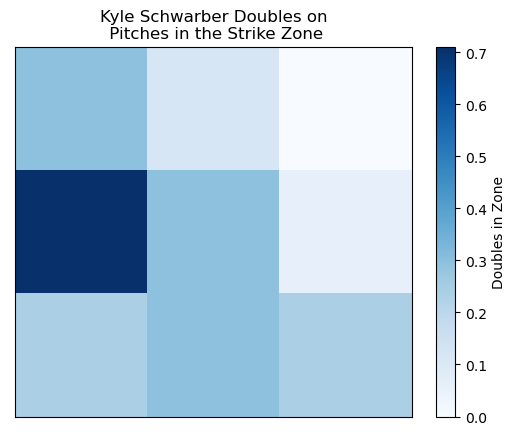

In [86]:
visualize_event(Schwarber, 'double')

In [87]:
Pujols_path = os.path.abspath("Documents\Statcast_Project\Statcast_Data\Pujols.csv")
Pujols = pd.read_csv(Pujols_path)
#create a list of events to enter into the "event" portion of the function
print(Pujols.events.value_counts())

field_out                    1867
single                        555
strikeout                     495
walk                          228
home_run                      182
grounded_into_double_play     128
double                        125
force_out                      59
sac_fly                        32
hit_by_pitch                   31
field_error                    20
intent_walk                    16
double_play                    13
fielders_choice_out            10
strikeout_double_play           1
Name: events, dtype: int64


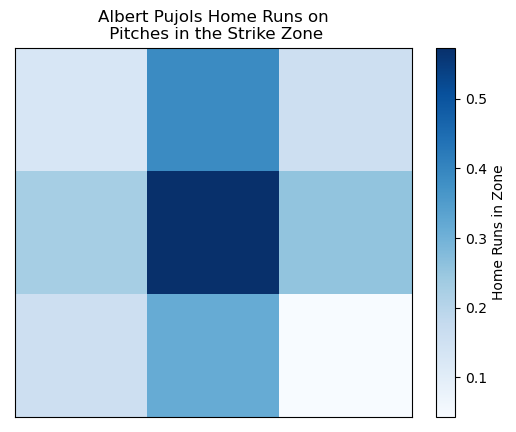

In [88]:
visualize_event(Pujols, 'home_run')

In [89]:
Noot_path = os.path.abspath("Documents\Statcast_Project\Statcast_Data\LNootbaar.csv")
Nootbaar = pd.read_csv(Noot_path)

print(Nootbaar.events.value_counts())

field_out                    189
strikeout                     99
walk                          62
single                        50
double                        19
home_run                      19
force_out                     13
sac_fly                        6
triple                         4
grounded_into_double_play      3
field_error                    1
hit_by_pitch                   1
fielders_choice_out            1
Name: events, dtype: int64


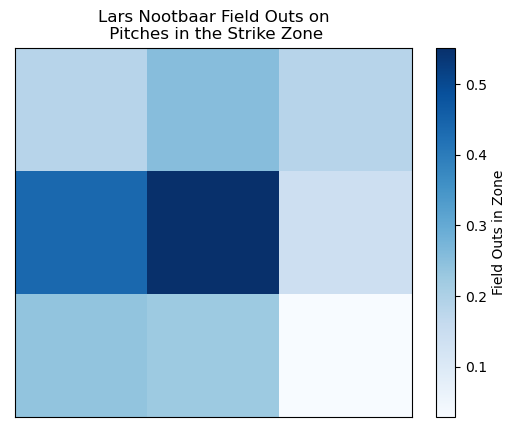

In [90]:
visualize_event(Nootbaar,'field_out')